In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

### Parameters

# Black-Scholes pricing

### Trajectory test

In [2]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

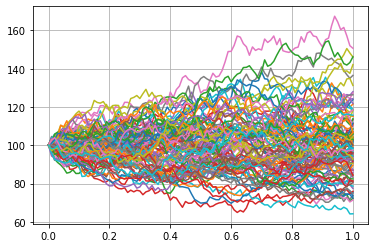

In [3]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [4]:
autocall = MonteCarlo(rate=.03, q=0.1, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [5]:
bs_model = BSPath(r=.03, sigma=.25, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [6]:
autocall.valuation(traj)

72.58% hit the barrier and the put is exercised 6.52% of the time


(102.10233747816679, 0.031014027270109615)

### Variation with the spot

In [7]:
spots = np.linspace(50, 150, 50)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=S0, freq=.25, mat=1, put_strike=.7*S0, notional=100)
    bs_model = BSPath(r=.03, sigma=.20, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

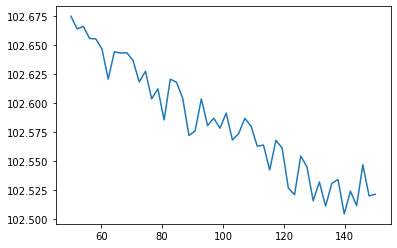

In [8]:
plt.plot(spots, prices[::, 0])

### Variation with the volatility

In [9]:
vols = np.linspace(.1, .3, 30)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

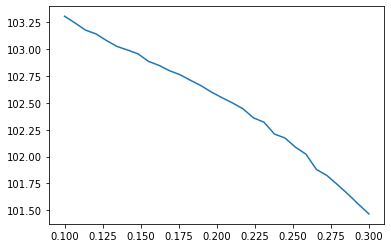

In [10]:
plt.plot(vols, prices[::, 0])

# Heston pricing

### Trajectory test